<a href="https://colab.research.google.com/github/DrKakku/Small-projects/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

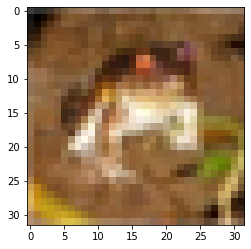

In [4]:
plt.imshow(x_train[0])
x_train.shape

In [5]:
y_train[0]

array([6], dtype=uint8)

In [8]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [13]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['Accuracy']
)

In [14]:
#we will normalise the data first then train it
x_train_normal = x_train / 255.0
x_test_normal = x_test / 255.0

In [16]:
model.fit(x_train_normal,y_train,epochs=10, 
                    validation_data=(x_test_normal, y_test))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1651 - Accuracy: 0.5875 - val_loss: 1.0781 - val_Accuracy: 0.6214
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0087 - Accuracy: 0.6458 - val_loss: 0.9830 - val_Accuracy: 0.6506
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9100 - Accuracy: 0.6820 - val_loss: 0.9553 - val_Accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8393 - Accuracy: 0.7049 - val_loss: 0.8972 - val_Accuracy: 0.6876
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7822 - Accuracy: 0.7256 - val_loss: 0.8822 - val_Accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7291 - Accuracy: 0.7458 - val_loss: 0.8526 - val_Accuracy: 0.7078
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6870 - Accuracy: 0.7577 - val_loss: 0.8450 -

In [17]:
model.evaluate(x_test_normal,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8742 - Accuracy: 0.7102


[0.8742441534996033, 0.7102000117301941]

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import cv2
testIm = cv2.imread("1.png")


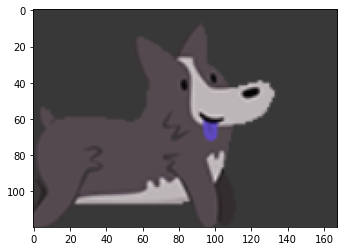

In [21]:
plt.imshow(testIm)

In [30]:

testIm = cv2.resize(testIm,(32,32))

In [33]:
testIm.shape
testIm_normal = np.array(testIm)/255.0

In [35]:
pred = model.predict(testIm_normal[np.newaxis, ...])

In [39]:
class_names[ pred.argmax()]

'bird'

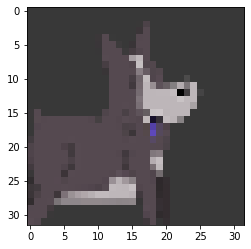

In [40]:
plt.imshow(testIm)

In [51]:
def preprocess(imgUrl):
    testIm = cv2.imread(imgUrl)
    testIm = cv2.cvtColor(testIm, cv2.COLOR_BGR2RGB)
    testIm = cv2.resize(testIm,(32,32))
    testIm_normal = np.array(testIm)/255.0
    return testIm , testIm_normal

In [52]:
##2nd test
x , norm_x = preprocess("2.png")

In [53]:
pred = model.predict(norm_x[np.newaxis, ...])

In [54]:
class_names[ pred.argmax()]

'cat'

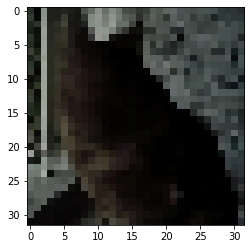

In [55]:
plt.imshow(x)

dog


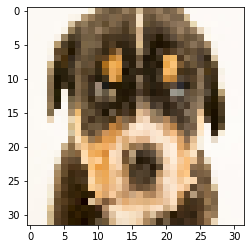

In [57]:
##3nd test
x , norm_x = preprocess("3.jpg")
pred = model.predict(norm_x[np.newaxis, ...])
print(class_names[ pred.argmax()])
plt.imshow(x)